## 3. Hypothesis Testing

In [12]:
# Import required modules
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv("Data\winequality-red.csv")

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_8356\1194014973.py:2: SyntaxWarning: invalid escape sequence '\w'
  df = pd.read_csv("Data\winequality-red.csv")


### 3.1. Testing whether mean pH is larger than 3.30

In [8]:
# Get pH column
pH = df['pH'].dropna()

# Print mean pH for verification
mean_pH = np.mean(pH)
print(f"Mean pH: {mean_pH}")

# Count how many entries
nEntries = pH.count()
print(f"Entries: {nEntries}")

Mean pH: 3.3111131957473416
Entries: 1599


Perform a one-tailed hypothesis test.

In [9]:
# Specify the hypothesized mean
mu = 3.3

# Specify the significance level
alpha = 0.05

# Specify the degrees of freedom
dof = nEntries - 1

# Get the sample mean and std
sample_mean = np.mean(pH)
sample_std = np.std(pH)

# Compute standard error (SE)
SE = sample_std / np.sqrt(nEntries)

# Get the test statistic
t_stat = (sample_mean - mu) / SE

# p-value for right-tailed test:
if t_stat > 0:
    p_value = 1 - stats.t.cdf(t_stat, dof)

else:
    p_value = 1.0

print("Single Tail Test against a hypothesized mean")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀).")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀).")


Single Tail Test against a hypothesized mean
t_stat =  2.879319227251562
p_value =  0.002019206511054028

Conclusion: Reject the null hypothesis (H₀).


Calculate a 95% Confidence Interval (CI) using the t-distribution.

In [10]:
# Define the 2-sided t critical value
t_crit = stats.t.ppf(1 - alpha/2, dof)

# Define the margin of error
margin_of_error = t_crit * SE

# Compute upper and lower bounds
ci_upper = sample_mean + margin_of_error
ci_lower = sample_mean - margin_of_error

# Display results
print(f"Sample mean (Height): {sample_mean:.2f}")
print(f"95% CI using t-dist: [{ci_lower:.2f}, {ci_upper:.2f}]")


Sample mean (Height): 3.31
95% CI using t-dist: [3.30, 3.32]


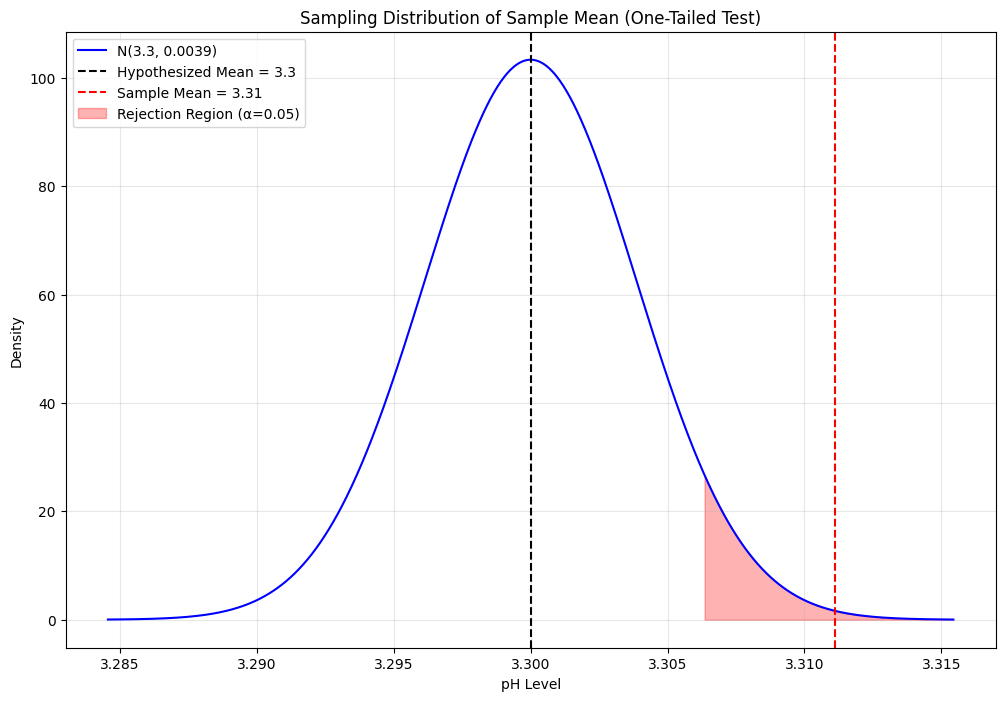

In [15]:
# Generate x-values for normal distribution under H0
x_values = np.linspace(mu - 4*SE, mu + 4*SE, 1000)
y_values = stats.norm.pdf(x_values, mu, SE)

# Plot sampling distribution
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, label=f"N({mu}, {round(SE, 4)})", color='blue')

# Plot hypothesized mean (H0)
plt.axvline(mu, color='black', linestyle='dashed', label=f"Hypothesized Mean = {mu}")

# Plot sample mean
plt.axvline(sample_mean, color='red', linestyle='dashed', label=f"Sample Mean = {round(sample_mean, 2)}")

# Shade rejection region for right-tailed test (α = 0.05)
crit_value = stats.t.ppf(1 - alpha, dof)  # Critical t-value
x_reject = np.linspace(mu + crit_value * SE, mu + 4*SE, 100)
y_reject = stats.norm.pdf(x_reject, mu, SE)
plt.fill_between(x_reject, y_reject, color='red', alpha=0.3, label="Rejection Region (α=0.05)")

# Formatting
plt.xlabel("pH Level")
plt.ylabel("Density")
plt.title("Sampling Distribution of Sample Mean (One-Tailed Test)")
plt.legend()
plt.grid(alpha=0.3)

# Show plot
plt.show()
